In [2]:
import requests
from datetime import datetime
import time
import json
import glob

import pandas as pd
import numpy as np
import geopandas as gpd
from pytz import timezone
%matplotlib inline
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [2]:
api_key = 'ac31e02046794bd3f959fbc98fc25231'

In [3]:
gdf = gpd.read_file('D:\Work\WB\LDT\countries\SRB\shapefiles\gadm41_SRB_2.json')
center = gpd.GeoDataFrame(gdf[['GID_2', 'NAME_2']])
center['geometry'] = gdf.centroid
center = center.to_crs(gdf.crs)
center['lat'] = center.geometry.y
center['lon'] = center.geometry.x
center
# gdf

C:\Users\sonle\AppData\Local\Temp\ipykernel_38400\2083312229.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center['geometry'] = gdf.centroid
C:\Users\sonle\AppData\Local\Temp\ipykernel_38400\2083312229.py:3: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  center['geometry'] = gdf.centroid


,GID_2,NAME_2,geometry,lat,lon
0,SRB.1.1_1,Bor,POINT (22.05425 44.07092),44.070917,22.054249
1,SRB.1.2_1,Kladovo,POINT (22.47141 44.56865),44.568655,22.471406
2,SRB.1.3_1,Majdanpek,POINT (22.058 44.38801),44.388008,22.057996
3,SRB.1.4_1,Negotin,POINT (22.42711 44.24799),44.247986,22.427111
4,SRB.2.1_1,Golubac,POINT (21.74048 44.60889),44.608886,21.740484
...,...,...,...,...,...
156,SRB.25.6_1,Požega,POINT (20.0178 43.88806),43.888056,20.017801
157,SRB.25.7_1,Priboj,POINT (19.40003 43.50832),43.508319,19.400028
158,SRB.25.8_1,Prijepolje,POINT (19.62589 43.32048),43.320476,19.625891
159,SRB.25.9_1,Sjenica,POINT (20.00164 43.20967),43.209667,20.001638


In [4]:
gid_2 = center['GID_2'].to_list()
lat = center['lat'].to_list()
lon = center['lon'].to_list()

loc_dict = {}
for i in range(len(gid_2)):
    loc_dict[gid_2[i]] = [lat[i], lon[i]]

In [5]:
loc_dict

{'SRB.1.1_1': [44.070916840003875, 22.05424872664738],
 'SRB.1.2_1': [44.5686546148656, 22.471405549626134],
 'SRB.1.3_1': [44.38800848123445, 22.057996177042046],
 'SRB.1.4_1': [44.247985541215726, 22.42711139779415],
 'SRB.2.1_1': [44.60888632367149, 21.74048439329081],
 'SRB.2.2_1': [44.45935440783599, 21.714726353653496],
 'SRB.2.3_1': [44.52122465631768, 21.335332314037128],
 'SRB.2.4_1': [44.337986357280606, 21.439651473279095],
 'SRB.2.5_1': [44.63989642646239, 21.190605805795062],
 'SRB.2.6_1': [44.687345803589444, 21.43636807884723],
 'SRB.2.7_1': [44.36787554880919, 21.214356338737765],
 'SRB.2.8_1': [44.19508760637038, 21.735714704002095],
 'SRB.3.1_1': [44.549994492875925, 20.371487647191852],
 'SRB.3.2_1': [44.68998770604238, 20.361058549735947],
 'SRB.3.3_1': [44.634950376453595, 20.652155765778986],
 'SRB.3.4_1': [44.37768730613215, 20.3008821128093],
 'SRB.3.5_1': [44.42604587242706, 20.681950629318763],
 'SRB.3.6_1': [44.79295725163482, 20.36386308456866],
 'SRB.3.7_1'

In [39]:
def create_json(loc:str, start: int, end: int) -> dict:
    lat = loc_dict[loc][0]
    lon = loc_dict[loc][1]
    hist_url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
    r = requests.get(hist_url)
    json_out = r.json()
    json_out['name'] = loc

    return json_out

year = 2022
start_date = int(time.mktime(datetime(year, 1, 1).timetuple()))
end_date = int(time.mktime(datetime(year, 12, 31).timetuple()))

for location_name in tqdm(list(loc_dict.keys())):
    print(location_name)
    json_res = create_json(location_name, start_date, end_date)
    with open(f"D:\Work\WB\LDT\countries\SRB\\raw_data\\air_pollution\municipalities\{location_name}_{year}.json", "w") as outfile: 
            json.dump(json_res, outfile)



C:\Users\sonle\AppData\Local\Temp\ipykernel_38400\901510604.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location_name in tqdm(list(loc_dict.keys())):


  0%|          | 0/161 [00:00<?, ?it/s]

SRB.1.1_1
SRB.1.2_1
SRB.1.3_1
SRB.1.4_1
SRB.2.1_1
SRB.2.2_1
SRB.2.3_1
SRB.2.4_1
SRB.2.5_1
SRB.2.6_1
SRB.2.7_1
SRB.2.8_1
SRB.3.1_1
SRB.3.2_1
SRB.3.3_1
SRB.3.4_1
SRB.3.5_1
SRB.3.6_1
SRB.3.7_1
SRB.3.8_1
SRB.3.9_1
SRB.3.10_1
SRB.3.11_1
SRB.3.12_1
SRB.3.13_1
SRB.3.14_1
SRB.3.15_1
SRB.3.16_1
SRB.3.17_1
SRB.4.1_1
SRB.4.2_1
SRB.4.3_1
SRB.4.4_1
SRB.4.5_1
SRB.4.6_1
SRB.5.1_1
SRB.5.2_1
SRB.5.3_1
SRB.5.4_1
SRB.5.5_1
SRB.5.6_1
SRB.5.7_1
SRB.5.8_1
SRB.5.9_1
SRB.5.10_1
SRB.5.11_1
SRB.5.12_1
SRB.6.1_1
SRB.6.2_1
SRB.6.3_1
SRB.6.4_1
SRB.6.5_1
SRB.6.6_1
SRB.6.7_1
SRB.6.8_1
SRB.7.1_1
SRB.7.2_1
SRB.7.3_1
SRB.7.4_1
SRB.7.5_1
SRB.7.6_1
SRB.8.1_1
SRB.8.2_1
SRB.8.3_1
SRB.8.4_1
SRB.8.5_1
SRB.8.6_1
SRB.8.7_1
SRB.8.8_1
SRB.9.1_1
SRB.9.2_1
SRB.9.3_1
SRB.9.4_1
SRB.10.1_1
SRB.10.2_1
SRB.10.3_1
SRB.10.4_1
SRB.10.5_1
SRB.10.6_1
SRB.10.7_1
SRB.11.1_1
SRB.11.2_1
SRB.11.3_1
SRB.11.4_1
SRB.11.5_1
SRB.11.6_1
SRB.11.7_1
SRB.12.1_1
SRB.12.2_1
SRB.12.3_1
SRB.12.4_1
SRB.13.1_1
SRB.13.2_1
SRB.13.3_1
SRB.14.1_1
SRB.14.2_1
SRB.14

In [111]:
# gdf = gpd.read_file('countries/SRB/gadm41_SRB_2.json')
# center = gpd.GeoDataFrame(gdf[['GID_2', 'NAME_2']])
# center['geometry'] = gdf.centroid
# center = center.to_crs(gdf.crs)
# center['lat'] = center.geometry.y
# center['lon'] = center.geometry.x

# gid_2 = center['GID_2'].to_list()
# lat = center['lat'].to_list()
# lon = center['lon'].to_list()

# loc_dict = {}
# for i in range(len(gid_2)):
#     loc_dict[gid_2[i]] = [lat[i], lon[i]]

# loc_dict

In [112]:
# def create_json(loc:str, start: int, end: int) -> dict:
#     lat = loc_dict[loc][0]
#     lon = loc_dict[loc][1]
#     hist_url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
#     r = requests.get(hist_url)
#     json_out = r.json()
#     json_out['name'] = loc

#     return json_out

# year = 2023
# start_date = int(time.mktime(datetime(year, 1, 1).timetuple()))
# end_date = int(time.mktime(datetime(year, 12, 31).timetuple()))

# for location_name in list(loc_dict.keys()):
#     print(location_name)
#     json_res = create_json(location_name, start_date, end_date)
#     with open(f"countries/SRB/air_pollution/municipalities/{location_name}_{year}.json", "w") as outfile: 
#             json.dump(json_res, outfile)




In [3]:
paths = glob.glob('D:\Work\WB\LDT\countries\SRB\\raw_data\\air_pollution\municipalities/*_2022.json')
paths.sort()
len(paths)

161

In [43]:
dfs = []

for path in tqdm(paths):
    # print(path)
    with open(path) as f:
        d = json.load(f)
    i = path.rindex('\\')

    no2 = [x['components']['no2'] for x in d['list']]
    so2 = [x['components']['so2'] for x in d['list']]
    co = [x['components']['co'] for x in d['list']]
    o3 = [x['components']['o3'] for x in d['list']]
    pm10 = [x['components']['pm10'] for x in d['list']]
    pm25 = [x['components']['pm2_5'] for x in d['list']]
    dt = [x['dt'] for x in d['list']]

    df = pd.DataFrame({'datetime_unix': dt,
                    'o3': o3,
                    'pm25': pm25,
                    'pm10': pm10,
                    'co': co,
                    'so2': so2,
                    'no2': no2})
    df['lon'] = d['coord']['lon']
    df['lat'] = d['coord']['lat']
    df['location'] = path[i+1:-10]
    dfs.append(df)

full_df = pd.concat(dfs, axis=0).reset_index(drop=True)
full_df['timestamp'] = pd.to_datetime(full_df['datetime_unix'],unit='s')
full_df['timestamp'] = full_df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Ho_Chi_Minh')
full_df = full_df.drop(['datetime_unix'], axis=1)
full_df = full_df[['location', 'lon', 'lat', 'timestamp',
                   'o3', 'pm25', 'pm10', 'co', 'so2', 'no2']]
full_df = full_df.sort_values(by=['location', 'timestamp']).reset_index(drop=True)
full_df

C:\Users\sonle\AppData\Local\Temp\ipykernel_38400\1850091446.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(paths):


  0%|          | 0/161 [00:00<?, ?it/s]

,location,lon,lat,timestamp,o3,pm25,pm10,co,so2,no2
0,SRB.1.1_1,22.0542,44.0709,2022-01-01 00:00:00+07:00,56.51,7.27,8.66,236.99,14.54,4.28
1,SRB.1.1_1,22.0542,44.0709,2022-01-01 01:00:00+07:00,57.22,6.78,8.33,240.33,14.78,4.07
2,SRB.1.1_1,22.0542,44.0709,2022-01-01 02:00:00+07:00,57.94,6.34,7.97,236.99,13.35,3.73
3,SRB.1.1_1,22.0542,44.0709,2022-01-01 03:00:00+07:00,57.94,5.92,7.53,236.99,11.09,3.30
4,SRB.1.1_1,22.0542,44.0709,2022-01-01 04:00:00+07:00,59.37,5.42,6.96,230.31,9.42,2.87
...,...,...,...,...,...,...,...,...,...,...
1371035,SRB.9.4_1,20.2648,43.7392,2022-12-30 20:00:00+07:00,57.94,5.09,6.88,223.64,1.01,2.38
1371036,SRB.9.4_1,20.2648,43.7392,2022-12-30 21:00:00+07:00,45.06,6.24,9.45,223.64,0.75,4.84
1371037,SRB.9.4_1,20.2648,43.7392,2022-12-30 22:00:00+07:00,37.91,7.20,11.60,230.31,0.59,7.71
1371038,SRB.9.4_1,20.2648,43.7392,2022-12-30 23:00:00+07:00,33.62,8.27,13.78,236.99,0.51,10.97


In [44]:
full_df['year'] = full_df['timestamp'].dt.year
full_df['date'] = full_df['timestamp'].dt.date
full_df

,location,lon,lat,timestamp,o3,pm25,pm10,co,so2,no2,year,date
0,SRB.1.1_1,22.0542,44.0709,2022-01-01 00:00:00+07:00,56.51,7.27,8.66,236.99,14.54,4.28,2022,2022-01-01
1,SRB.1.1_1,22.0542,44.0709,2022-01-01 01:00:00+07:00,57.22,6.78,8.33,240.33,14.78,4.07,2022,2022-01-01
2,SRB.1.1_1,22.0542,44.0709,2022-01-01 02:00:00+07:00,57.94,6.34,7.97,236.99,13.35,3.73,2022,2022-01-01
3,SRB.1.1_1,22.0542,44.0709,2022-01-01 03:00:00+07:00,57.94,5.92,7.53,236.99,11.09,3.30,2022,2022-01-01
4,SRB.1.1_1,22.0542,44.0709,2022-01-01 04:00:00+07:00,59.37,5.42,6.96,230.31,9.42,2.87,2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1371035,SRB.9.4_1,20.2648,43.7392,2022-12-30 20:00:00+07:00,57.94,5.09,6.88,223.64,1.01,2.38,2022,2022-12-30
1371036,SRB.9.4_1,20.2648,43.7392,2022-12-30 21:00:00+07:00,45.06,6.24,9.45,223.64,0.75,4.84,2022,2022-12-30
1371037,SRB.9.4_1,20.2648,43.7392,2022-12-30 22:00:00+07:00,37.91,7.20,11.60,230.31,0.59,7.71,2022,2022-12-30
1371038,SRB.9.4_1,20.2648,43.7392,2022-12-30 23:00:00+07:00,33.62,8.27,13.78,236.99,0.51,10.97,2022,2022-12-30


In [47]:
full_df = full_df.sort_values(by=['location', 'timestamp'])


def calculate_rolling_avg(group):
    # https://environment.ec.europa.eu/topics/air/air-quality/eu-air-quality-standards_en
    # https://uk-air.defra.gov.uk/air-pollution/faq?question=20#:~:text=The%20maximum%20daily%20running%208,average%20concentrations%20over%20a%20year. 

    group = group.sort_index()
    group['o3_8hr_avg'] = group['o3'].rolling(window=8, min_periods=1).mean()
    # group['co_8hr_avg'] = group['co'].rolling(window=8, min_periods=1).mean()
    return group

full_df = full_df.groupby('location').apply(calculate_rolling_avg).reset_index(drop=True)
o3_daily = full_df.groupby(['location', 'year', 'date']).agg(o3_daily=('o3_8hr_avg', 'max')).reset_index()
o3_yearly = o3_daily.groupby(['location', 'year']).agg(o3=('o3_daily', 'mean')).reset_index()
o3_yearly

C:\Users\sonle\AppData\Local\Temp\ipykernel_38400\1765404289.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  full_df = full_df.groupby('location').apply(calculate_rolling_avg).reset_index(drop=True)


,location,year,o3
0,SRB.1.1_1,2022,83.223843
1,SRB.1.2_1,2022,82.699687
2,SRB.1.3_1,2022,81.591422
3,SRB.1.4_1,2022,79.895999
4,SRB.10.1_1,2022,85.749346
...,...,...,...
155,SRB.8.7_1,2022,84.135554
156,SRB.8.8_1,2022,84.628065
157,SRB.9.1_1,2022,79.494700
158,SRB.9.2_1,2022,79.423444


In [48]:
pm25_yearly = full_df.groupby(['location', 'year']).agg(pm25=('pm25', 'mean')).reset_index()
pm25_yearly

,location,year,pm25
0,SRB.1.1_1,2022,8.200826
1,SRB.1.2_1,2022,8.020168
2,SRB.1.3_1,2022,8.813018
3,SRB.1.4_1,2022,8.931743
4,SRB.10.1_1,2022,10.482962
...,...,...,...
155,SRB.8.7_1,2022,10.768622
156,SRB.8.8_1,2022,11.244723
157,SRB.9.1_1,2022,9.239583
158,SRB.9.2_1,2022,10.745974


In [49]:
out_df = pd.merge(pm25_yearly, o3_yearly, on=['location', 'year'], how='inner')
out_df = out_df.rename({'location': 'GID_2'}, axis=1)
out_df

,GID_2,year,pm25,o3
0,SRB.1.1_1,2022,8.200826,83.223843
1,SRB.1.2_1,2022,8.020168,82.699687
2,SRB.1.3_1,2022,8.813018,81.591422
3,SRB.1.4_1,2022,8.931743,79.895999
4,SRB.10.1_1,2022,10.482962,85.749346
...,...,...,...,...
155,SRB.8.7_1,2022,10.768622,84.135554
156,SRB.8.8_1,2022,11.244723,84.628065
157,SRB.9.1_1,2022,9.239583,79.494700
158,SRB.9.2_1,2022,10.745974,79.423444


In [50]:
out_df.to_csv('D:\Work\WB\LDT\countries\SRB\datasets\SRB_air_pollution_2022_GID2.csv', index=False)

In [5]:
out_df = pd.read_csv('D:\Work\WB\LDT\countries\SRB\datasets\SRB_air_pollution_2022.csv')
out_df.describe()

,year,pm25,o3
count,160.0,160.000000,160.000000
mean,2022.0,9.996509,81.864510
std,0.0,1.848380,3.055232
min,2022.0,5.445319,71.010155
25%,2022.0,9.044666,80.535840
50%,2022.0,9.745466,82.269742
75%,2022.0,11.142077,83.863773
max,2022.0,14.926655,88.083168


In [4]:
dfs = []

for path in tqdm(paths):
    # print(path)
    with open(path) as f:
        d = json.load(f)
    i = path.rindex('\\')

    no2 = [x['components']['no2'] for x in d['list']]
    so2 = [x['components']['so2'] for x in d['list']]
    co = [x['components']['co'] for x in d['list']]
    o3 = [x['components']['o3'] for x in d['list']]
    pm10 = [x['components']['pm10'] for x in d['list']]
    pm25 = [x['components']['pm2_5'] for x in d['list']]
    dt = [x['dt'] for x in d['list']]

    df = pd.DataFrame({'datetime_unix': dt,
                    'o3': o3,
                    'pm25': pm25,
                    'pm10': pm10,
                    'co': co,
                    'so2': so2,
                    'no2': no2})
    df['lon'] = d['coord']['lon']
    df['lat'] = d['coord']['lat']
    df['location'] = path[i+1:-10]
    dfs.append(df)

full_df = pd.concat(dfs, axis=0).reset_index(drop=True)
full_df['timestamp'] = pd.to_datetime(full_df['datetime_unix'],unit='s')
full_df['timestamp'] = full_df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Ho_Chi_Minh')
full_df = full_df.drop(['datetime_unix'], axis=1)
full_df = full_df[['location', 'lon', 'lat', 'timestamp',
                   'o3', 'pm25', 'pm10', 'co', 'so2', 'no2']]
full_df = full_df.sort_values(by=['location', 'timestamp']).reset_index(drop=True)
full_df

C:\Users\sonle\AppData\Local\Temp\ipykernel_45600\1850091446.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(paths):


  0%|          | 0/161 [00:00<?, ?it/s]

,location,lon,lat,timestamp,o3,pm25,pm10,co,so2,no2
0,SRB.1.1_1,22.0542,44.0709,2022-01-01 00:00:00+07:00,56.51,7.27,8.66,236.99,14.54,4.28
1,SRB.1.1_1,22.0542,44.0709,2022-01-01 01:00:00+07:00,57.22,6.78,8.33,240.33,14.78,4.07
2,SRB.1.1_1,22.0542,44.0709,2022-01-01 02:00:00+07:00,57.94,6.34,7.97,236.99,13.35,3.73
3,SRB.1.1_1,22.0542,44.0709,2022-01-01 03:00:00+07:00,57.94,5.92,7.53,236.99,11.09,3.30
4,SRB.1.1_1,22.0542,44.0709,2022-01-01 04:00:00+07:00,59.37,5.42,6.96,230.31,9.42,2.87
...,...,...,...,...,...,...,...,...,...,...
1371035,SRB.9.4_1,20.2648,43.7392,2022-12-30 20:00:00+07:00,57.94,5.09,6.88,223.64,1.01,2.38
1371036,SRB.9.4_1,20.2648,43.7392,2022-12-30 21:00:00+07:00,45.06,6.24,9.45,223.64,0.75,4.84
1371037,SRB.9.4_1,20.2648,43.7392,2022-12-30 22:00:00+07:00,37.91,7.20,11.60,230.31,0.59,7.71
1371038,SRB.9.4_1,20.2648,43.7392,2022-12-30 23:00:00+07:00,33.62,8.27,13.78,236.99,0.51,10.97


In [41]:
import geopandas as gpd
import shapely
from shapely.geometry import box
import numpy as np

# Load the Serbia shapefile
serbia = gpd.read_file(r"D:\Work\WB\LDT\countries\SRB\shapefiles\gadm41_SRB_0.json")

# Define the grid size (in degrees). 5 km roughly corresponds to ~0.045 degrees at the equator.
# Adjust as necessary depending on the accuracy needed
grid_size = 0.045  # Approximate value for 5km, may need adjustment based on local conditions
# grid_size = 0.009 # Approximate value for 1km

# Get the bounds of the Serbia geometry
minx, miny, maxx, maxy = serbia.total_bounds

# Create the grid cells
grid_cells = []
x_coords = np.arange(minx, maxx, grid_size)
y_coords = np.arange(miny, maxy, grid_size)

for x in x_coords:
    for y in y_coords:
        # Create a box and add it to the grid cells list if it intersects with Serbia geometry
        grid_cell = box(x, y, x + grid_size, y + grid_size)
        if serbia.geometry.intersects(grid_cell).any():
            grid_cells.append(grid_cell)

# Create a GeoDataFrame from the grid cells
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=serbia.crs)
# grid = grid.to_crs(epsg=3857)

In [42]:
# output_file = "D:\Work\WB\LDT\countries\SRB\shapefiles/serbia_clipped_grid_5km.geojson"
# grid.to_file(output_file, driver="GeoJSON")

In [43]:
serbia_2 = gpd.read_file(r"D:\Work\WB\LDT\countries\SRB\shapefiles\gadm41_SRB_2.json")
grid['lat'] = grid.centroid.y
grid['lon'] = grid.centroid.x
grid

C:\Users\sonle\AppData\Local\Temp\ipykernel_2788\2503357355.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['lat'] = grid.centroid.y
C:\Users\sonle\AppData\Local\Temp\ipykernel_2788\2503357355.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['lon'] = grid.centroid.x


,geometry,lat,lon
0,"POLYGON ((18.8537 45.7826, 18.8537 45.8276, 18...",45.8051,18.8312
1,"POLYGON ((18.8537 45.8276, 18.8537 45.8726, 18...",45.8501,18.8312
2,"POLYGON ((18.8537 45.8726, 18.8537 45.9176, 18...",45.8951,18.8312
3,"POLYGON ((18.8987 45.5576, 18.8987 45.6026, 18...",45.5801,18.8762
4,"POLYGON ((18.8987 45.6026, 18.8987 45.6476, 18...",45.6251,18.8762
...,...,...,...
4648,"POLYGON ((22.9487 43.1276, 22.9487 43.1726, 22...",43.1501,22.9262
4649,"POLYGON ((22.9487 43.1726, 22.9487 43.2176, 22...",43.1951,22.9262
4650,"POLYGON ((22.9937 43.0826, 22.9937 43.1276, 22...",43.1051,22.9712
4651,"POLYGON ((22.9937 43.1276, 22.9937 43.1726, 22...",43.1501,22.9712


In [44]:
import requests
import concurrent
api_key = "1a0a6114e0a3cd8d74021e208dfa160b"

lats = grid['lat'].to_list()
lons = grid['lon'].to_list()
coords = [[lons[i], lats[i]] for i in range(len(lats))]
coords

[[18.831200000000003, 45.80510000000014],
 [18.831200000000003, 45.85010000000014],
 [18.831200000000003, 45.89510000000014],
 [18.8762, 45.58010000000013],
 [18.8762, 45.62510000000013],
 [18.8762, 45.71510000000013],
 [18.8762, 45.76010000000013],
 [18.8762, 45.80510000000014],
 [18.8762, 45.85010000000014],
 [18.8762, 45.89510000000014],
 [18.8762, 45.94010000000015],
 [18.92120000000001, 45.535100000000135],
 [18.92120000000001, 45.58010000000013],
 [18.92120000000001, 45.62510000000013],
 [18.92120000000001, 45.67010000000013],
 [18.92120000000001, 45.71510000000013],
 [18.92120000000001, 45.76010000000013],
 [18.92120000000001, 45.80510000000014],
 [18.92120000000001, 45.85010000000014],
 [18.92120000000001, 45.89510000000014],
 [18.92120000000001, 45.94010000000015],
 [18.966200000000008, 45.35510000000013],
 [18.966200000000008, 45.40010000000012],
 [18.966200000000008, 45.445100000000124],
 [18.966200000000008, 45.49010000000013],
 [18.966200000000008, 45.535100000000135],
 [1

In [45]:
year = 2023
start_date = int(time.mktime(datetime(year, 1, 1).timetuple()))
end_date = int(time.mktime(datetime(year, 12, 31).timetuple()))

def create_json(i, coords:list, start: int, end: int) -> dict:
    print(i)
    lon = coords[0]
    lat = coords[1]
    
    hist_url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'
    r = requests.get(hist_url)
    json_out = r.json()
    json_out['name'] = i
    json_out['lon'] = lon
    json_out['lat'] = lat

    with open(f"D:\Work\WB\LDT\countries\SRB\\raw_data\\air_pollution\grids\{i}_{year}.json", "w") as outfile: 
            json.dump(json_out, outfile)

    return 


with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
            futures = [executor.submit(create_json, i, coords[i], start_date, end_date) for i in range(len(coords))]

            # Wait for all futures to complete
            # concurrent.futures.wait(futures)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
4142

43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241242

243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [46]:
grid['grid_n'] = grid.index
grid

,geometry,lat,lon,grid_n
0,"POLYGON ((18.8537 45.7826, 18.8537 45.8276, 18...",45.8051,18.8312,0
1,"POLYGON ((18.8537 45.8276, 18.8537 45.8726, 18...",45.8501,18.8312,1
2,"POLYGON ((18.8537 45.8726, 18.8537 45.9176, 18...",45.8951,18.8312,2
3,"POLYGON ((18.8987 45.5576, 18.8987 45.6026, 18...",45.5801,18.8762,3
4,"POLYGON ((18.8987 45.6026, 18.8987 45.6476, 18...",45.6251,18.8762,4
...,...,...,...,...
4648,"POLYGON ((22.9487 43.1276, 22.9487 43.1726, 22...",43.1501,22.9262,4648
4649,"POLYGON ((22.9487 43.1726, 22.9487 43.2176, 22...",43.1951,22.9262,4649
4650,"POLYGON ((22.9937 43.0826, 22.9937 43.1276, 22...",43.1051,22.9712,4650
4651,"POLYGON ((22.9937 43.1276, 22.9937 43.1726, 22...",43.1501,22.9712,4651


In [47]:
paths = glob.glob('D:\Work\WB\LDT\countries\SRB\\raw_data\\air_pollution\grids/*_2023.json')
paths.sort()

dfs = []

for path in tqdm(paths):
    # print(path)
    with open(path) as f:
        d = json.load(f)
    i = path.rindex('\\')
    j = path.rindex('_')

    no2 = [x['components']['no2'] for x in d['list']]
    so2 = [x['components']['so2'] for x in d['list']]
    co = [x['components']['co'] for x in d['list']]
    o3 = [x['components']['o3'] for x in d['list']]
    pm10 = [x['components']['pm10'] for x in d['list']]
    pm25 = [x['components']['pm2_5'] for x in d['list']]
    dt = [x['dt'] for x in d['list']]

    df = pd.DataFrame({'datetime_unix': dt,
                    'o3': o3,
                    'pm25': pm25,
                    'pm10': pm10,
                    'co': co,
                    'so2': so2,
                    'no2': no2})
    df['lon'] = d['coord']['lon']
    df['lat'] = d['coord']['lat']
    df['grid_n'] = path[i+1:j]
    dfs.append(df)

full_df = pd.concat(dfs, axis=0).reset_index(drop=True)
full_df['timestamp'] = pd.to_datetime(full_df['datetime_unix'],unit='s')
full_df['timestamp'] = full_df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Ho_Chi_Minh')
full_df = full_df.drop(['datetime_unix'], axis=1)
full_df = full_df[['grid_n', 'lon', 'lat', 'timestamp',
                   'o3', 'pm25', 'pm10', 'co', 'so2', 'no2']]
full_df = full_df.sort_values(by=['grid_n', 'timestamp']).reset_index(drop=True)
full_df['grid_n'] = full_df['grid_n'].astype(int)
full_df

C:\Users\sonle\AppData\Local\Temp\ipykernel_2788\331561422.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm(paths):


  0%|          | 0/4653 [00:00<?, ?it/s]

,grid_n,lon,lat,timestamp,o3,pm25,pm10,co,so2,no2
0,0,18.8312,45.8051,2023-01-01 00:00:00+07:00,51.50,13.23,14.66,216.96,0.56,2.61
1,0,18.8312,45.8051,2023-01-01 01:00:00+07:00,50.07,13.85,15.30,220.30,0.51,2.83
2,0,18.8312,45.8051,2023-01-01 02:00:00+07:00,47.21,14.10,15.60,223.64,0.44,2.87
3,0,18.8312,45.8051,2023-01-01 03:00:00+07:00,44.35,14.41,15.94,226.97,0.36,2.96
4,0,18.8312,45.8051,2023-01-01 04:00:00+07:00,41.48,14.90,16.46,230.31,0.31,2.91
...,...,...,...,...,...,...,...,...,...,...
40090480,999,19.8212,45.2201,2023-12-30 20:00:00+07:00,50.07,7.74,9.48,253.68,2.00,5.27
40090481,999,19.8212,45.2201,2023-12-30 21:00:00+07:00,40.05,7.20,9.45,260.35,0.80,7.54
40090482,999,19.8212,45.2201,2023-12-30 22:00:00+07:00,32.19,7.05,9.72,267.03,0.51,10.11
40090483,999,19.8212,45.2201,2023-12-30 23:00:00+07:00,25.03,7.40,10.54,280.38,0.48,13.88


In [48]:
full_df['year'] = full_df['timestamp'].dt.year
full_df['date'] = full_df['timestamp'].dt.date
full_df.head()

,grid_n,lon,lat,timestamp,o3,pm25,pm10,co,so2,no2,year,date
0,0,18.8312,45.8051,2023-01-01 00:00:00+07:00,51.50,13.23,14.66,216.96,0.56,2.61,2023,2023-01-01
1,0,18.8312,45.8051,2023-01-01 01:00:00+07:00,50.07,13.85,15.30,220.30,0.51,2.83,2023,2023-01-01
2,0,18.8312,45.8051,2023-01-01 02:00:00+07:00,47.21,14.10,15.60,223.64,0.44,2.87,2023,2023-01-01
3,0,18.8312,45.8051,2023-01-01 03:00:00+07:00,44.35,14.41,15.94,226.97,0.36,2.96,2023,2023-01-01
4,0,18.8312,45.8051,2023-01-01 04:00:00+07:00,41.48,14.90,16.46,230.31,0.31,2.91,2023,2023-01-01


In [53]:
full_df.describe()

,grid_n,lon,lat,o3,pm25,pm10,co,so2,no2,year
count,4.009048e+07,4.009048e+07,4.009048e+07,4.009048e+07,4.009048e+07,4.009048e+07,4.009048e+07,4.009048e+07,4.009048e+07,40090485.0
mean,2.326117e+03,2.078363e+01,4.422435e+01,5.442893e+01,8.713651e+00,1.092169e+01,2.298274e+02,2.677986e+00,3.848398e+00,2023.0
std,1.343230e+03,1.014899e+00,9.502742e-01,1.114861e+02,7.742864e+00,1.021102e+01,4.486243e+01,6.492895e+00,4.028981e+00,0.0
min,0.000000e+00,1.883120e+01,4.225010e+01,-9.999000e+03,5.000000e-01,5.100000e-01,7.844000e+01,0.000000e+00,6.000000e-02,2023.0
25%,1.163000e+03,1.995620e+01,4.346510e+01,3.541000e+01,3.690000e+00,4.520000e+00,2.002700e+02,3.400000e-01,1.300000e+00,2023.0
50%,2.326000e+03,2.067620e+01,4.418510e+01,5.507000e+01,6.620000e+00,8.040000e+00,2.236400e+02,8.500000e-01,2.660000e+00,2023.0
75%,3.489000e+03,2.166620e+01,4.495010e+01,7.510000e+01,1.128000e+01,1.381000e+01,2.503400e+02,2.500000e+00,4.970000e+00,2023.0
max,4.652000e+03,2.297120e+01,4.621010e+01,2.346000e+02,1.445300e+02,1.579300e+02,9.212500e+02,4.196200e+02,1.137900e+02,2023.0


In [49]:
pm25_yearly = full_df.groupby(['grid_n', 'year']).agg(pm25=('pm25', 'mean')).reset_index()
pm25_yearly

,grid_n,year,pm25
0,0,2023,8.145829
1,1,2023,8.145829
2,2,2023,8.145829
3,3,2023,8.609117
4,4,2023,8.609117
...,...,...,...
4648,4648,2023,5.848286
4649,4649,2023,5.848286
4650,4650,2023,5.848286
4651,4651,2023,5.848286


In [50]:
pm10_yearly = full_df.groupby(['grid_n', 'year']).agg(pm25=('pm10', 'mean')).reset_index()
pm10_yearly

,grid_n,year,pm25
0,0,2023,9.767535
1,1,2023,9.767535
2,2,2023,9.767535
3,3,2023,10.280412
4,4,2023,10.280412
...,...,...,...
4648,4648,2023,7.836586
4649,4649,2023,7.836586
4650,4650,2023,7.836586
4651,4651,2023,7.836586


In [51]:
pm10_yearly.describe()

,grid_n,year,pm25
count,4653.000000,4653.0,4653.000000
mean,2326.000000,2023.0,10.921438
std,1343.349731,0.0,1.907884
min,0.000000,2023.0,6.820032
25%,1163.000000,2023.0,9.794981
50%,2326.000000,2023.0,10.745366
75%,3489.000000,2023.0,11.999061
max,4652.000000,2023.0,18.398726


In [52]:
pm25_yearly['pm25'].describe()

count    4653.000000
mean        8.713424
std         1.524323
min         4.993970
25%         7.931831
50%         8.775360
75%         9.768371
max        13.985030
Name: pm25, dtype: float64

In [17]:
serbia_2 = gpd.read_file(r"D:\Work\WB\LDT\countries\SRB\shapefiles\gadm41_SRB_2.json")
grid['grid_n'] = grid.index

combined = gpd.GeoDataFrame(pm25_yearly.merge(grid[['grid_n', 'geometry']], on=['grid_n'], how='left')).sjoin(serbia_2)
combined = combined.groupby(['GID_2', 'year']).agg({'pm25': 'mean'}).reset_index()
serbia_2 = serbia_2.merge(combined, on=['GID_2'], how='left')
serbia_2.to_file(r"D:\Work\WB\LDT\countries\SRB\raw_data\air_pollution\serbia_new_methodology.json", driver='GeoJSON', index=False)

(np.float64(18.60019),
 np.float64(23.18741),
 np.float64(42.02951),
 np.float64(46.38749))

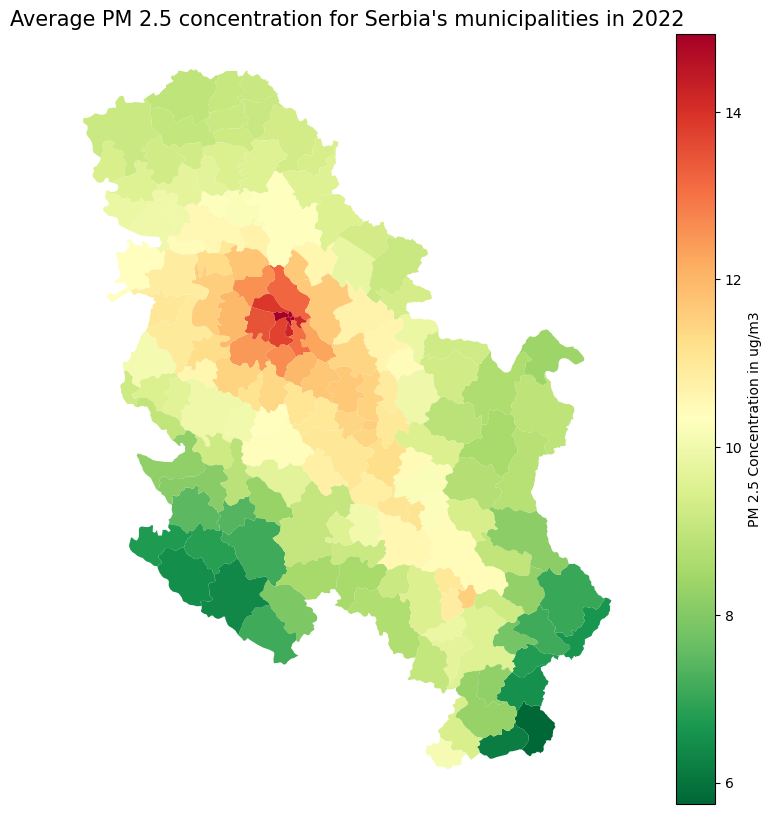

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

serbia_2.plot(column='pm25',
              cmap='RdYlGn_r',
              legend=True,
              ax=ax,
              legend_kwds={"label": "PM 2.5 Concentration in ug/m3", "orientation": "vertical"})
ax.grid(False)
ax.set_title("Average PM 2.5 concentration for Serbia's municipalities in 2022", fontsize=15)
plt.axis('off')

In [36]:
serbia_2['WHO'] = np.where(serbia_2['pm25'] > 5, "Yes", "No")
serbia_2

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,year,pm25,WHO
0,SRB.1.1_1,SRB,Serbia,SRB.1_1,Borski,Борски,Bor,NA,Бор,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((21.9554 44.1779, 21.9912 44.17...",2022,8.545606,Yes
1,SRB.1.2_1,SRB,Serbia,SRB.1_1,Borski,Борски,Kladovo,Claudia|Kladowo,Кладово,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((22.6492 44.5411, 22.644 44.545...",2022,8.384525,Yes
2,SRB.1.3_1,SRB,Serbia,SRB.1_1,Borski,Борски,Majdanpek,NA,Мајданпек,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((22.1915 44.4985, 22.1967 44.51...",2022,8.669472,Yes
3,SRB.1.4_1,SRB,Serbia,SRB.1_1,Borski,Борски,Negotin,NA,Неготин,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((22.6851 44.2099, 22.6853 44.20...",2022,8.904657,Yes
4,SRB.2.1_1,SRB,Serbia,SRB.2_1,Braničevski,Браничевски,Golubac,Galambóc|Golumbácz|Güvercinlik,Голубац,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((21.8695 44.6506, 21.8972 44.64...",2022,9.236344,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,SRB.25.6_1,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,Požega,NA,Пожега,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((20.0095 44.1042, 20.0168 44.09...",2022,8.890670,Yes
157,SRB.25.7_1,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,Priboj,NA,Прибој,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((19.1857 43.5351, 19.192 43.539...",2022,6.725044,Yes
158,SRB.25.8_1,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,Prijepolje,NA,Пријепоље,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((19.7437 43.1509, 19.7071 43.14...",2022,6.481786,Yes
159,SRB.25.9_1,SRB,Serbia,SRB.25_1,Zlatiborski,Златиборски,Sjenica,NA,Сјеница,Opštine,Town|Municipal,NA,NA,"MULTIPOLYGON (((20.0337 42.9851, 20.0094 43.01...",2022,6.383428,Yes


<Axes: >

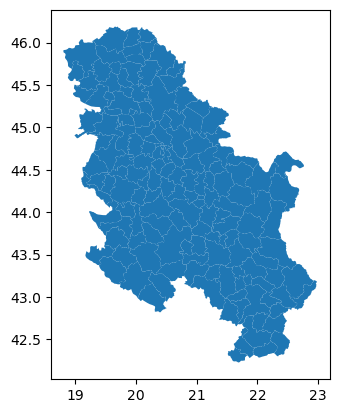

In [37]:
serbia_2.plot(column='WHO')